In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

In [2]:
import nltk

In [4]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  d



Download which package (l=list; x=cancel)?


  Identifier>  strop sas


    Error loading strop: Package 'strop' not found in index
    Error loading sas: Package 'sas' not found in index



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  stopwords


Command 'stopwords' unrecognized

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  stopwords


Command 'stopwords' unrecognized

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  d



Download which package (l=list; x=cancel)?


  Identifier>  stopwords


        C:\Users\GIGABYTE\AppData\Roaming\nltk_data...
      Unzipping corpora\stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  q


## 

#### How to use? Comes up next after some EDA.

# 

# EDA

In [3]:
messages = pd.read_csv('SMSSpamCollection', sep= '\t', names= ['label', 'text'] )
messages

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [50]:
for i in messages[messages['text'].str.lower().str.find('computer') > 0]['text']:
    print(i)
    print()

How would my ip address test that considering my computer isn't a minecraft server

Hello baby, did you get back to your mom's ? Are you setting up the computer now ? Filling your belly ? How goes it loverboy ? I miss you already ... *sighs*

Well. Im computerless. Time to make some oreo truffles

BIG BROTHER ALERT! The computer has selected u for 10k cash or #150 voucher. Call 09064018838. NTT PO Box CRO1327 18+ BT Landline Cost 150ppm mobiles vary

Do u noe how 2 send files between 2 computers?

Play w computer? Aiyah i tok 2 u lor?

Don know..he is watching film in computer..

YOU HAVE WON! As a valued Vodafone customer our computer has picked YOU to win a £150 prize. To collect is easy. Just call 09061743386

Ujhhhhhhh computer shipped out with address to sandiago and parantella lane. Wtf. Poop.

My computer just fried the only essential part we don't keep spares of because my fucking idiot roommates looovvve leaving the thing running on full  &lt;#&gt; /7

A £400 XMAS REWARD IS WA

## 

In [51]:
messages.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [53]:
messages.groupby('label').describe()

text                                                               
      count unique                                                top freq
label                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

## 

## Now, it comes to the feature engineering.
How well do you Featurize the given data into some meaningful information...

    So given the data, we are actully filtering the messages in the spam and ham - so we need to think of what are those features which contributes to a message being a spam of ham.
                                                                                                           ↑    ↑    ↑     ↑        ↑

In [4]:
plt.style.use('dark_background')
plt.rcParams['axes.grid'] = False

<AxesSubplot:xlabel='label', ylabel='count'>

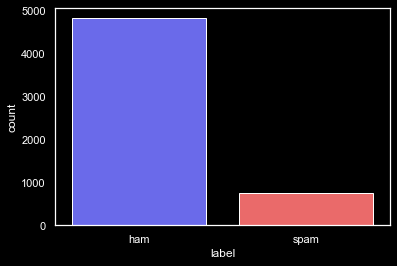

In [61]:
sns.countplot(x= 'label', data= messages, palette= 'seismic')

Oops, there are relatevily more Hams than Spams... that can't be a nice choice...

## That's all data we have!
# Done?

### Nah! - We have to do the magic `called: `**`Feature Engineering`**
then we will be having a LOT of DATA.

In [62]:
messages

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


Tell me what is the very first thing can we do with this to get a sense of how the Hams are seperated with spams?

> Length!

In [63]:
messages['length'] = messages['text'].apply(len)
messages

,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


One feature has been "*Engineered*".

In [68]:
plt.rcParams['figure.figsize'] = (20, 5)

<AxesSubplot:xlabel='length', ylabel='Count'>

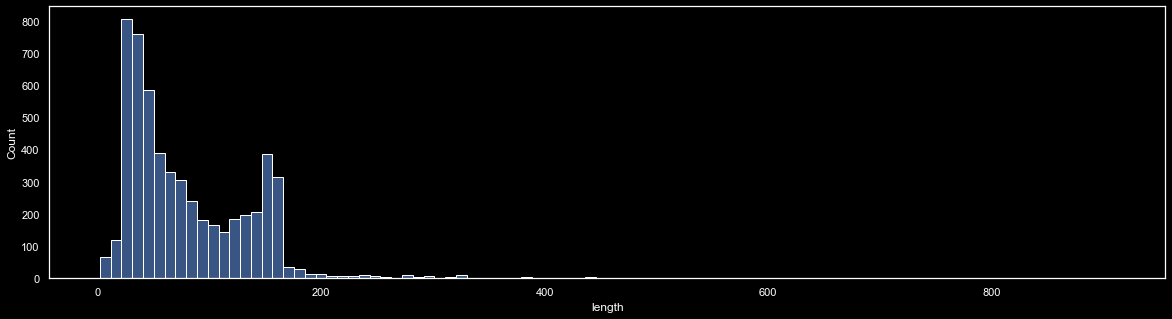

In [69]:
sns.histplot(x= 'length', data= messages)

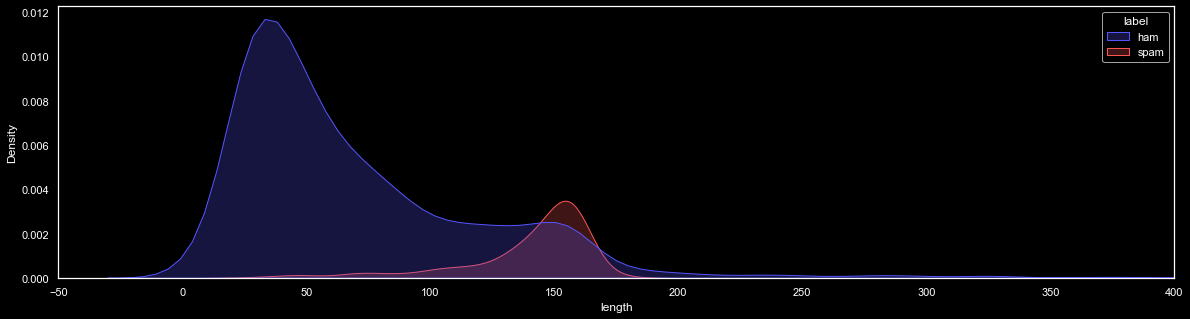

In [79]:
ax = plt.axes()
sns.kdeplot(x= 'length', data= messages, hue= 'label', ax= ax, fill= True, palette= 'seismic')
ax.set_xlim([-50, 400]);

There `length` feature came out to be very useful!   <br>
Which shows that, the SPAMS are tend to be more in length than the HAMS.

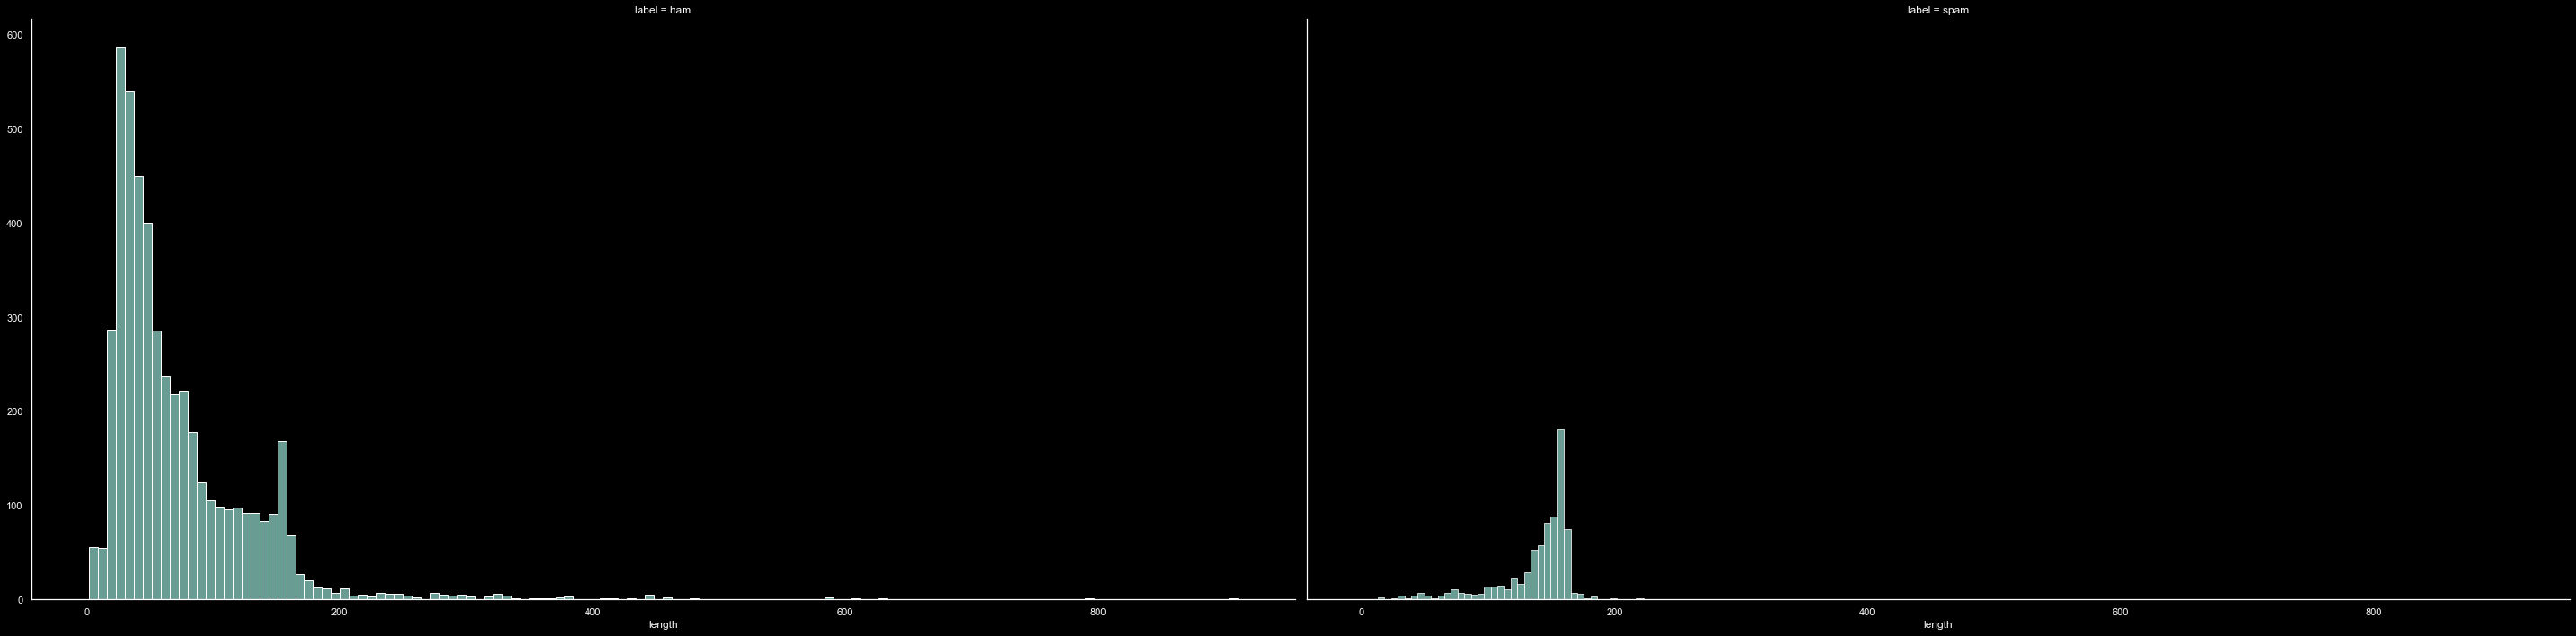

In [89]:
facet = sns.FacetGrid(messages, col= "label", aspect= 2, height= 10)
facet.map(sns.histplot, "length")

# The MINIMUM message in SPAM

In [90]:
messages[ (messages['length'] < 50) & (messages['label'] == 'spam') ]

,label,text,length
415,spam,100 dating service cal;l 09064012103 box334sk38ch,49
713,spam,08714712388 between 10am-7pm Cost 10p,37
955,spam,Filthy stories and GIRLS waiting for your,41
1196,spam,You have 1 new voicemail. Please call 08719181503,49
1777,spam,Call FREEPHONE 0800 542 0578 now!,33
2079,spam,85233 FREE>Ringtone!Reply REAL,30
2269,spam,88066 FROM 88066 LOST 3POUND HELP,33
2295,spam,You have 1 new message. Please call 08718738034.,48
2699,spam,FROM 88066 LOST £12 HELP,24
2804,spam,FreeMsg>FAV XMAS TONES!Reply REAL,33


# The MAXIMUM message in SPAM

In [96]:
messages[ (messages['length'] > 170) & (messages['label'] == 'spam') ]

,label,text,length
42,spam,07732584351 - Rodger Burns - MSG = We tried to...,172
463,spam,"UpgrdCentre Orange customer, you may now claim...",175
1687,spam,todays vodafone numbers ending with 0089(my la...,172
1734,spam,"Hi, this is Mandy Sullivan calling from HOTMIX...",223
2247,spam,Hi ya babe x u 4goten bout me?' scammers getti...,181
2297,spam,<Forwarded from 21870000>Hi - this is your Mai...,183
2620,spam,<Forwarded from 21870000>Hi - this is your Mai...,173
3266,spam,"44 7732584351, Do you want a New Nokia 3510i c...",173
3679,spam,Promotion Number: 8714714 - UR awarded a City ...,177
3720,spam,"Thanks for your ringtone order, reference numb...",197


# The MAXIMUM message in HAM (which are quite not common to be)

In [101]:
messages[ (messages['length'] > 350) & (messages['label'] == 'ham') ]

,label,text,length
155,ham,"You are everywhere dirt, on the floor, the win...",384
838,ham,"Sir, I have been late in paying rent for the p...",372
1085,ham,For me the love should start with attraction.i...,910
1513,ham,"Hey sweet, I was wondering when you had a mome...",458
1579,ham,How to Make a girl Happy? It's not at all diff...,611
1863,ham,The last thing i ever wanted to do was hurt yo...,790
2010,ham,I can't keep going through this. It was never ...,431
2012,ham,Do whatever you want. You know what the rules ...,375
2090,ham,No i'm not. I can't give you everything you wa...,363
2134,ham,Spoke with uncle john today. He strongly feels...,382


In [103]:
messages.iloc[2434]['text']

'Indians r poor but India is not a poor country. Says one of the swiss bank directors. He says that " &lt;#&gt;  lac crore" of Indian money is deposited in swiss banks which can be used for \'taxless\' budget for  &lt;#&gt;  yrs. Can give  &lt;#&gt;  crore jobs to all Indians. From any village to Delhi 4 lane roads. Forever free power suply to more than  &lt;#&gt;  social projects. Every citizen can get monthly  &lt;#&gt; /- for  &lt;#&gt;  yrs. No need of World Bank &amp; IMF loan. Think how our money is blocked by rich politicians. We have full rights against corrupt politicians. Itna forward karo ki pura INDIA padhe.g.m."'

# 

## Furtherly, we can create the moods... like the theme is about `Love`, `Story`, `Planning`, `Causual Message`, `Prize`, `Service` and more... we can extract them - but for now continuing with the lecture.

# 

<b><font face="nexa" size= 7> NEW! </font></b>

# Use this new module
```python
import string
```

In [5]:
import string

In [108]:
string.ascii_letters

'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [109]:
string.ascii_lowercase

'abcdefghijklmnopqrstuvwxyz'

In [110]:
string.digits

'0123456789'

In [111]:
string.hexdigits

'0123456789abcdefABCDEF'

In [112]:
string.printable

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c'

### Main thing why we imported

In [115]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

### So that we can remove them... from the messages which can create unnecessary combination of words

# 

## Now, finally importing that `Stopwords`

In [6]:
from nltk.corpus import stopwords

In [124]:
for word in stopwords.words()[:100]: #There are for all(some) languages!
    print(word, end=' ')

إذ إذا إذما إذن أف أقل أكثر ألا إلا التي الذي الذين اللاتي اللائي اللتان اللتيا اللتين اللذان اللذين اللواتي إلى إليك إليكم إليكما إليكن أم أما أما إما أن إن إنا أنا أنت أنتم أنتما أنتن إنما إنه أنى أنى آه آها أو أولاء أولئك أوه آي أي أيها إي أين أين أينما إيه بخ بس بعد بعض بك بكم بكم بكما بكن بل بلى بما بماذا بمن بنا به بها بهم بهما بهن بي بين بيد تلك تلكم تلكما ته تي تين تينك ثم ثمة حاشا حبذا حتى حيث حيثما حين خلا دون ذا ذات ذاك ذان ذانك 

In [125]:
len(stopwords.words())

6800

In [135]:
len(stopwords.words('english'))

179

In [16]:
english_words = stopwords.words('english')
english_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

# 

## We will use `Stop words` and `Punctuation` filters to filter out messages

In [153]:
def filter_them(messed):
    messed = ''.join([char for char in messed if char not in string.punctuation])
    messed = ' '.join([word for word in messed.split() if word.lower() not in english_words])
    return messed

In [155]:
messages

,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [161]:
filtered = messages.text.apply(filter_them)
filtered

0       Go jurong point crazy Available bugis n great ...
1                                 Ok lar Joking wif u oni
2       Free entry 2 wkly comp win FA Cup final tkts 2...
3                     U dun say early hor U c already say
4             Nah dont think goes usf lives around though
                              ...                        
5567    2nd time tried 2 contact u U £750 Pound prize ...
5568                          ü b going esplanade fr home
5569                          Pity mood Soany suggestions
5570    guy bitching acted like id interested buying s...
5571                                       Rofl true name
Name: text, Length: 5572, dtype: object

## This was very common and *easy* way to do the `introductory feature engineering`...

There is another thing, which is a little bit advance, called `stamming`, which refers to the **elimination** of the repeating words like - Play, Played, Playing. They refer to the same thing - to play!

# 

### Okay, now we have one thing in here, which is the `CountVectorizer` ...
We already have worked with it, in the book... 

____
# Refresher from the BOOK

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
data = ['Aayush shah is the amazing person on the planet',
        'He has got brain and amazing things to do',
        'Aayush has many plans and he will surely execute them to the success',
       'I know, I believe, Aayush will do it.']

In [9]:
vec = CountVectorizer().fit(data)

In [175]:
tran = vec.transform(data)
tran

<4x26 sparse matrix of type '<class 'numpy.int64'>'
	with 36 stored elements in Compressed Sparse Row format>

In [176]:
tran.todense()

matrix([[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
         2, 0, 0, 0, 0],
        [0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 1, 1, 0],
        [1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
         1, 1, 0, 1, 1],
        [1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 1]], dtype=int64)

In [177]:
vec.get_feature_names()

['aayush',
 'amazing',
 'and',
 'believe',
 'braing',
 'do',
 'execute',
 'got',
 'has',
 'he',
 'is',
 'it',
 'know',
 'many',
 'on',
 'person',
 'planet',
 'plans',
 'shah',
 'success',
 'surely',
 'the',
 'them',
 'things',
 'to',
 'will']

In [178]:
pd.DataFrame(tran.todense(), columns= [vec.get_feature_names()])

,aayush,amazing,and,believe,braing,do,execute,got,has,he,...,planet,plans,shah,success,surely,the,them,things,to,will
0,1,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,2,0,0,0,0
1,0,1,1,0,1,1,0,1,1,1,...,0,0,0,0,0,0,0,1,1,0
2,1,0,1,0,0,0,1,0,1,1,...,0,1,0,1,1,1,1,0,1,1
3,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Cool right?

____

# As you have noticed...
    We are having the `Default` 'vec' with the default parameters, and what it does is, splits the simple text with the ' ' (spaces) and then with the remaining words, it does its verctorization.
                                                                       ↑     ↑  ↑          ↑    ↑    ↑      ↑    ↑                                        

# But now, we want...

    The text to be passed from 2 stages of filteriztion i.e. removal of punctuation and removal of stopwords. 
    
    We can do that in these ways...
    
    Way 1
    ========
    
```python
filtered = messages.text.apply(filter_them)
vecotrizer = CountVectorizer()
vectorizer.fit(filtered)

vecotrizer.transform(filtered)

>>> '''<5572x9437 sparse matrix of type '<class 'numpy.int64'>'
	with 47493 stored elements in Compressed Sparse Row format>'''

```

    But here, there is another way which is used by the instructor...
    
    Way 2
    ========
    
```python
vecotrizer = CountVectorizer(analyzer= filter_them)   # <-----   filter_them is our function
vectorizer.fit(filtered)

vectorizer.transform(filtered)
```
    

## The `Second way` sounds cool, as it allows us to define our own Analyzer, instead of the old one (which just seperates with spaces). 
• So, no need to create any special variable to hold the whole (but filtered) strings.  

Here we can do anything...

# BUT! We need to change our `FUNCTION`!

As the CountVectorizer needs LIST of words, we need to return it in the list, well till now our function `filter_them` is returning whole filtered string.
Let's change that a little quick.

# 

# 

# What if I don't change the function?

In [191]:
vecotrizer = CountVectorizer(analyzer= filter_them)

In [186]:
vecotrizer.fit(messages.text)

CountVectorizer(analyzer=<function filter_them at 0x0000006BE020FC10>)

In [189]:
vecotrizer.transform(messages.text).toarrayrray()

array([[15,  0,  0, ...,  0,  0,  0],
       [ 5,  0,  0, ...,  0,  0,  0],
       [22,  5,  5, ...,  0,  0,  0],
       ...,
       [ 3,  0,  0, ...,  0,  0,  0],
       [13,  0,  0, ...,  0,  0,  0],
       [ 2,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [190]:
vecotrizer.get_feature_names()

[' ',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '\x91',
 '\x92',
 '\x93',
 '\x94',
 '\x96',
 '¡',
 '£',
 '»',
 'É',
 'Ü',
 'è',
 'é',
 'ì',
 'ú',
 'ü',
 '–',
 '—',
 '‘',
 '’',
 '“',
 '…',
 '┾',
 '〨',
 '鈥']

## That ↑ happens.
(Basically, it needs an iterator, so there were just simple messages and one string. So took each alphabet as a distinct word. And, see! HAHA)

# 

# Changing the function.

In [118]:
def filter_them(messed):
    messed = ''.join([char for char in messed if char not in string.punctuation])
    messed = [word for word in messed.split() if word.lower() not in english_words]
    return messed

In [119]:
vecotrizer = CountVectorizer(analyzer= filter_them)
vecotrizer.fit(messages.text)

CountVectorizer(analyzer=<function filter_them at 0x000000F2401F2310>)

In [120]:
vecotrizer.transform(messages.text)

<5572x11425 sparse matrix of type '<class 'numpy.int64'>'
	with 50548 stored elements in Compressed Sparse Row format>

In [121]:
ready_sparse = vecotrizer.transform(messages.text).toarray()
ready_sparse

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Okay! Great!

# 

In [201]:
ready_sparse.shape

(5572, 11425)

In [206]:
vecotrizer.vocabulary_ # (WHOLE DICT with COUNTS)

{'Go': 2060,
 'jurong': 7555,
 'point': 8917,
 'crazy': 5769,
 'Available': 1110,
 'bugis': 5218,
 'n': 8336,
 'great': 6937,
 'world': 11163,
 'la': 7668,
 'e': 6217,
 'buffet': 5217,
 'Cine': 1483,
 'got': 6906,
 'amore': 4653,
 'wat': 10965,
 'Ok': 3064,
 'lar': 7701,
 'Joking': 2451,
 'wif': 11072,
 'u': 10698,
 'oni': 8590,
 'Free': 1941,
 'entry': 6331,
 '2': 423,
 'wkly': 11123,
 'comp': 5619,
 'win': 11084,
 'FA': 1833,
 'Cup': 1551,
 'final': 6557,
 'tkts': 10512,
 '21st': 443,
 'May': 2804,
 '2005': 430,
 'Text': 3953,
 '87121': 871,
 'receive': 9252,
 'questionstd': 9159,
 'txt': 10686,
 'rateTCs': 9200,
 'apply': 4731,
 '08452810075over18s': 73,
 'U': 4068,
 'dun': 6204,
 'say': 9554,
 'early': 6222,
 'hor': 7186,
 'c': 5261,
 'already': 4629,
 'Nah': 2948,
 'dont': 6123,
 'think': 10433,
 'goes': 6877,
 'usf': 10799,
 'lives': 7842,
 'around': 4777,
 'though': 10450,
 'FreeMsg': 1943,
 'Hey': 2222,
 'darling': 5864,
 '3': 543,
 'weeks': 11011,
 'word': 11150,
 'back': 4893

## 

In [24]:
temp_message = messages.text[3]
temp_message

'U dun say so early hor... U c already then say...'

In [25]:
for_this_message = vecotrizer.transform([temp_message])
for_this_message

<1x11425 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [26]:
for_this_message.shape

(1, 11425)

In [229]:
print(for_this_message)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [230]:
vecotrizer.get_feature_names()[4068]

'U'

In [231]:
vecotrizer.get_feature_names()[9554]

'say'

# Sou, Sou, Sou easy....

# 

# 

## TF-IDF

In [10]:
from sklearn.feature_extraction.text import TfidfTransformer

--> The RF-IDF requires the CountMatrix <--
(not the set of messages - as it directly calculates from the counts)

**The Situation:**
    
|Document |Aayush | Shah | amazing | world | person |
| ---     | ---   | ---  | ---     | ---   | --     |
| 0       | 1     | 0    | 0       | 1     | 1      |
| 1       | 1     | 0    | 0       | 1     | 1      |      
| 2       | 1     | 4    | 0       | 2     | 1      |
| 3       | 1     | 0    | 2       | 1     | 0      |
| 4       | 1     | 4    | 2       | 1     | 1      |

So based on this, the readyly available sparce matrix, it will count `TF-IDF` score for every word.

In [23]:
vecotrizer.get_feature_names()

['0',
 '008704050406',
 '0089my',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '020603',
 '0207',
 '02070836089',
 '02072069400',
 '02073162414',
 '02085076972',
 '020903',
 '021',
 '050703',
 '0578',
 '06',
 '060505',
 '061104',
 '07008009200',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '071104',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07786200117',
 '077xxx',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '0784987',
 '0789xxxxxxx',
 '0794674629107880867867',
 '0796XXXXXX',
 '07973788240',
 '07XXXXXXXXX',
 '07xxxxxxxxx',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08450542832',
 '084528

In [27]:
tf_idf = TfidfTransformer().fit(ready_sparse)

In [57]:
all_tf_idfs = tf_idf.transform(ready_sparse)

In [28]:
tf_for_message = tf_idf.transform(for_this_message)
tf_for_message

<1x11425 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [29]:
print(tf_for_message)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


# 

#### A weight of single word

In [246]:
tf_idf.idf_[vecotrizer.vocabulary_['bullshit']]

8.93254160700959

In [149]:
temp[temp['bullshit'] > 0]

,0,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,020603,0207,...,Ü,Üll,é,ü,üll,–,“,“Harry,…,…Thanks
4291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [153]:
tf_idf.idf_.shape

(11425,)

In [163]:
(tf_idf.idf_ == tf_idf.idf_.max()).sum()

6531

# # Ask Grras... 
What is tf_idf.idf_ ?

In [164]:
whole_message = tf_idf.transform(ready_sparse)

### 

# FIRST TIME!

He introduces

# `NAIVE BAYES` classifier!

# 

In [167]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

Now, we have the X as `whole_message` sparse matrix and `label = spam / ham`

In [166]:
model = MultinomialNB().fit(whole_message, messages['label'])

In [172]:
text = "My name is Aayush, and I believe in myself"

sparse = vecotrizer.transform([text])
check = tf_idf.transform(sparse)

In [173]:
model.predict(check)

array(['ham'], dtype='<U4')

# 

In [193]:
pred = model.predict(whole_message)

In [195]:
accuracy_score(messages['label'], pred)

0.9793610911701364

# WHO WHO WHO

# 

# 

In [196]:
from sklearn.model_selection import train_test_split

In [197]:
Xtrain, Xtest, ytrain, ytest = train_test_split(messages['text'], messages['label'], test_size= 0.3)

###### SCROLL

# 

# 

# 

# 

# 

# 

# 

# 

# 

# 

# 

# <font face= "nexa" size= 4>• Finally introduces • </font>

# <font face= "nexa" style= "font-size:150px"> sklearn PIPELINE! </font>

In [198]:
from sklearn.pipeline import Pipeline

```python
pipe = Pipeline(steps)
```

In [199]:
pipe = Pipeline([
    ('vectorizer', CountVectorizer(analyzer= filter_them)),
    ('tf_idf', TfidfTransformer()),
    ('model', MultinomialNB())
])

In [200]:
pipe.fit(Xtrain, ytrain)

Pipeline(steps=[('vectorizer',
                 CountVectorizer(analyzer=<function filter_them at 0x000000F2401F2310>)),
                ('tf_idf', TfidfTransformer()), ('model', MultinomialNB())])

In [202]:
pred = pipe.predict(Xtest)

In [203]:
accuracy_score(ytest, pred)

0.9593301435406698